# Q5

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## part a

Text(0.5, 1.0, 'original image')

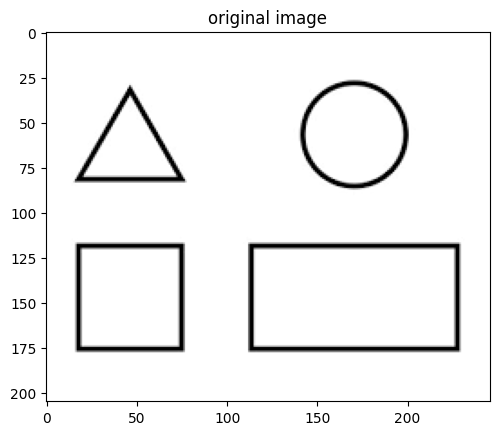

In [2]:
image = cv2.imread('images/Q7.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image , cmap='gray')
plt.title('original image')

Text(0.5, 1.0, 'binary image')

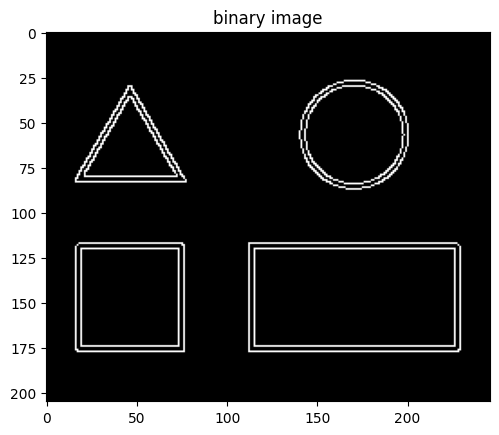

In [3]:
# pre-process: making binary image

canny_img = cv2.Canny(gray_image, 60, 100)

plt.imshow(canny_img , cmap='gray')
plt.title('binary image')


In [4]:
# finding contours

contours, hierarchy = cv2.findContours(canny_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

Text(0.5, 1.0, 'contours drawed')

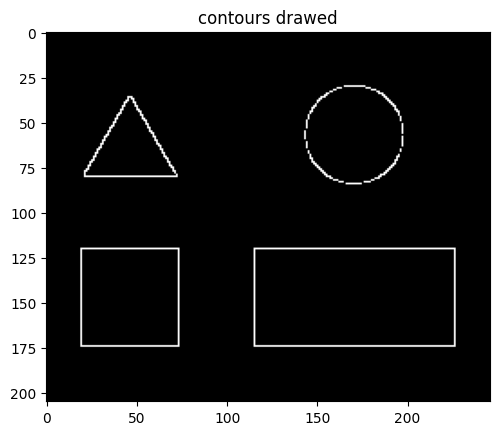

In [5]:
# drawing contours
contours_image = canny_img.copy()
cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

plt.imshow(contours_image, cmap='gray')
plt.title('contours drawed')

## part b)

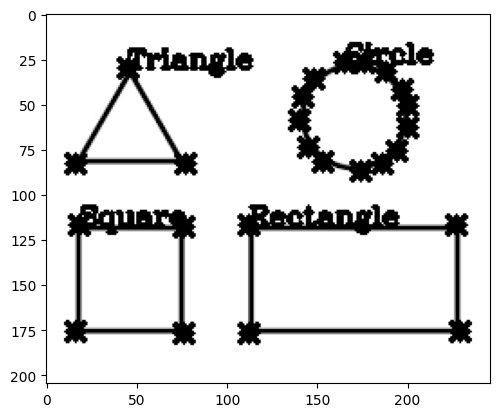

In [6]:

for contour in contours:
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approximations = cv2.approxPolyDP(contour, epsilon, True)
    # cv2.drawContours(canny_img, [approximations], 0, (0), 3)
    for point in approximations:
        #mark the corners
        cv2.drawMarker(gray_image, tuple(point[0]), (0,0,0), cv2.MARKER_STAR, 10, 2)
    #the name of the detected shapes are written on the image
    i, j = approximations[0][0]
    if len(approximations) == 3:
        cv2.putText(gray_image, "Triangle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,255,0), 2)
    elif len(approximations) == 4:
        x,y,w,h = cv2.boundingRect(contour)
        if w==h:
             cv2.putText(gray_image, "Square", (i, j), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,255,0), 2)
        else:
            cv2.putText(gray_image, "Rectangle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,255,0), 2)
    elif len(approximations) == 5:
        cv2.putText(gray_image, "Pentagon", (i, j), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,255,0), 2)
    else:
        cv2.putText(gray_image, "Circle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,255,0), 2)

plt.imshow(gray_image, cmap='gray')